*Title:* Testing variable effect on play playtime in the UBC Minecraft server. 

*Introduction:* 

Background: The UBC Minecraft server in which UBC students join and are able to play the video game. A group in CS at UBC wanted an insight into the statistics of who played the game. They had three main questions, and the question I came up with for this project aligns with which question centered around which players they should attempt to recruit onto their server. 

Question: Which player gender, and which level of experience, has a greater effect on playtime? 

Data Description: The data that was used in this project is called "players.csv". This file contains information on the players that have played on the UBC Minecraft server. It contains 196 observations (different players' information). Variables (different information about the players) gathered includes;

- experience: level of experience playing Minecraft
- subscribe: 
- hashedEmail:
- played_hours: total hours played on the server
- name: name of player
- gender: gender of player
- age: age of player

For general background knowledge, the total average playtime on the server amoungst all 196 players is just under 6 hours.



*Method & Results:* 

1) We need to load packages into our R notebook in order to use all of our functions properly. We used the library() function in order to load them into our notebook.

In [1]:
#MAKE 2 BAR GRAPHS SHOWING THE MEAN PLAYTIME OF DIFFERENT GENDERS AND DIFFERENT EXPERIENCE LEVELS 
#MAKE A LINEAR REGRESSION MODEL THAT ALLOWS US TO SEE THE COEFFICIENTS OF EACH VARIABLE 
    #REMEMBER THAT A LINEAR REGRESSION MODEL IS BASED OFF ANOTHER VARIABLE 
    #SO WE MAKE 2 DIFFERENT PLOTS FOR EACH VARIABLE AND REFERENCE IT OFF OF SOMETHING ELSE

library(tidyverse)
library(repr)
library(infer)
library(tidymodels)
library(tidyclust)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter

*Method & Results:*

2) Now lets load our players.csv file onto our R notebook. We use the function read_csv() to read our file as its a comma seperated file, and we named it as players_data in our notebook. I also made a table called average_playtime, which just used the summarize function and mean to get the mean playtime of all players, I did this to include some background information in my introduction. 

In [2]:
#Reading the downloaded data from canvas
#I didn't need to download the sessions data as it wasn't needed to answer my question

players_data <- read_csv("players.csv") 
players_data

#Just average playtime (included in introduction)
average_playtime <- summarize(players_data, mean_playtime = mean(played_hours))
average_playtime

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


mean_playtime
<dbl>
5.845918


*Method & Results:*

3) Now what we are doing is making 2 seperate datasets based off of our original players_data dataset by using group_by and summarize. One of these data sets includes the average playtime for each gender, and the other includes average play time per experience level. Then I plotted thwse on a bar graph, so the reader can visualize the difference in average playtime between genders and experience levels.

Something we must note about these produced graphs; they are not solely based off of their respective observations (gender type or experience level), there are other factors that are effecting the count (like age for example), but this is a good insight to have before we seperate the observations from other factors effecting the count. 

gender,average_hours
<chr>,<dbl>
Agender,6.250000
Female,10.635135
Male,4.127419
⋮,⋮
Other,0.20000000
Prefer not to say,0.37272727
Two-Spirited,0.08333333


experience,average_hours
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


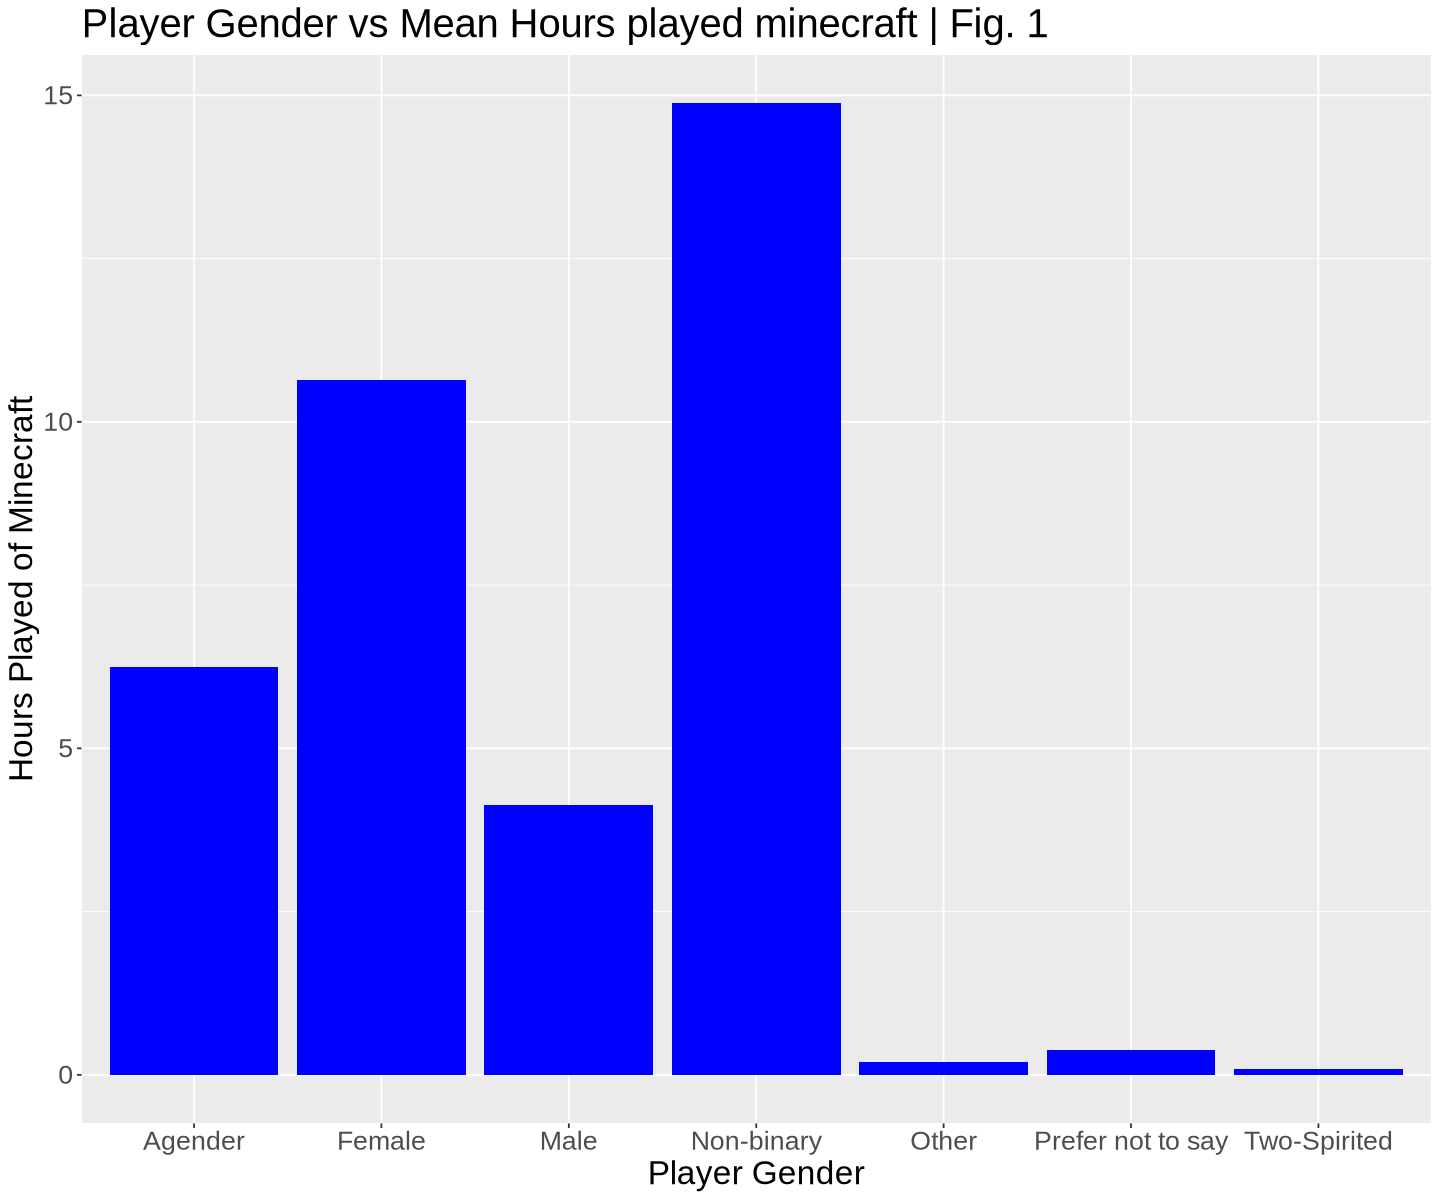

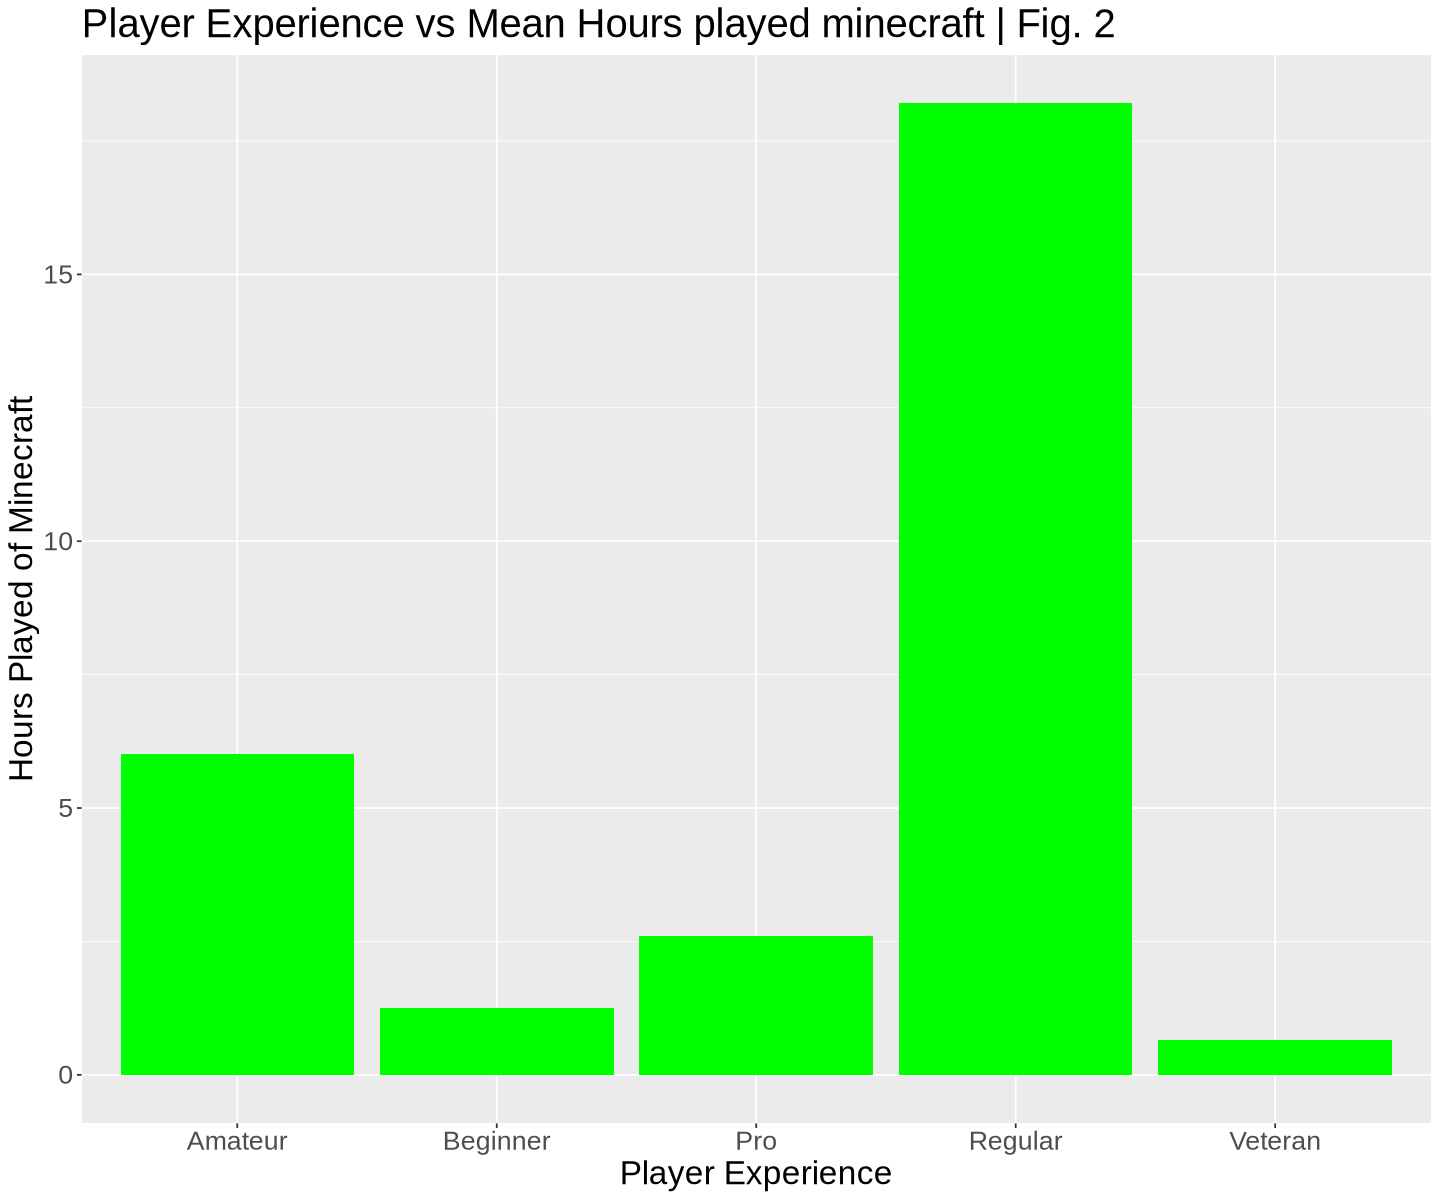

In [3]:
#PLOT SHOWING MEAN PLAYTIME VS GENDER 

#SOMETHING WE HAVE TO REMEMBER ABOUT THIS PLOT: IT ALSO TAKES INTO ACCOUNT OTHER FACTORS AND VARIABLES, SO ITS NOT JUST ONE OR THE OTHER
options(repr.plot.width = 12, repr.plot.height = 10)

players_data_mean_playtime_gender <- players_data |>
    group_by(gender) |>
    summarise(average_hours = mean(played_hours, na.rm = TRUE))
players_data_mean_playtime_gender

gender_time_played_plot <- ggplot(players_data_mean_playtime_gender, aes(x = gender, y = average_hours)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(title = "Player Gender vs Mean Hours played minecraft | Fig. 1", x = "Player Gender", y = "Hours Played of Minecraft") +
    theme(text = element_text(size = 20))
gender_time_played_plot 

#PLOT SHOWING MEAN PLAYTIME VS EXPERIENCE:: IT ALSO TAKES INTO ACCOUNT OTHER FACTORS AND VARIABLES, SO ITS NOT JUST ONE OR THE OTHER
players_data_mean_playtime_experience <- players_data |>
    group_by(experience) |>
    summarise(average_hours = mean(played_hours, na.rm = TRUE))
players_data_mean_playtime_experience

experience_time_played_plot <- ggplot(players_data_mean_playtime_experience, aes(x = experience, y = average_hours)) +
    geom_bar(stat = "identity", fill = "green") +
    labs(title = "Player Experience vs Mean Hours played minecraft | Fig. 2", x = "Player Experience", y = "Hours Played of Minecraft") +
    theme(text = element_text(size = 20))
experience_time_played_plot



*Method & Results:*

4) Now we want to seperate the gender and experience from other factors that could effect playtime. To do this I made a linear regression model, the reason this model was selected is because it will help us seperate each of the 2 variables so we can view them independently.

Linear regression for a variable is based off (in reference to) an observation within that variable, due to this, I redid the linear regression process twice for gender and twice for experience, using a different reference. To change the reference, I used fct_relevel, to set the specific gender and experience as the observation to be referenced. This linear regression model is based off of Male gender and Regular experience. 

I created a recipe, predicted hours_played by gender and experience, then I created a linear regression model, and lastly I put them together in a workflow!





In [4]:
#MAKING WORKFLOW 
#THIS TIME OUR REFERENCE IS GOING TO BE MALE AND REGULAR EXPERIENCE (RANDOM PICK!)
#WE WILL ALSO DO ANOTHER REFERENCE LATER; WITH THE LOWEST MEAN PLAYTIME.

#MAKING MALE AND REGULAR EXPERIENCE AS A REFERENCE 
players_data_new <- players_data |>
    mutate(gender = fct_relevel(gender, "Male"), experience = fct_relevel(experience, "Regular"))
players_data_new

#MAKE RECIPE: 
#NO SCALING AS THEY ARENT NUMBER VARIABLES
recipe <- recipe(played_hours ~ gender + experience, data = players_data_new) 

#MAKE A MODEL USING LINEAR REGRESSION SO WE CAN SEE COEFFICIENTS 
model <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

#ADD RECIPE AND MODEL INTO A WORKFLOW TOGETHER 
workflow <- workflow() |>
    add_recipe(recipe) |>
    add_model(model)
workflow

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
Linear Regression Model Specification (regression)

Computational engine: lm 


*Method & Results:*

5) I fitted the workflow onto the players_data_new dataset. This is so I can see the coefficients for each observation; which tells us how that speficic observation effects playtime (we have seperated the variable from other factors!).



In [5]:
#EVALUATE THE COEFFICENTS USING PREDICT; ADD OUR WORKFLOW TO OUR FITTED MODEL (TRAINING DATA)

fitted_model <- fit(workflow, data = players_data_new)
fitted_model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)            genderAgender             genderFemale  
                16.5758                   8.7922                   8.2090  
       genderNon-binary              genderOther  genderPrefer not to say  
                12.6364                  -0.6406                  -3.2966  
     genderTwo-Spirited        experienceAmateur       experienceBeginner  
                -5.3818                 -12.0322                 -18.5356  
          experiencePro        experienceVeteran  
               -15.7353                 -19.1181  


*Method & Results:*

6) I did this to tidy the fitted model. This allows me to use the coefficients data and plot it using ggplot.

I also made 2 seperate dataframes based off of this coefficient data, one which included gender coefficients, and one which included experience level coefficients. This makes it easier for when I am plotting the plots.

In [6]:
#MAKE IT SO WE CAN SEE THIS DATA IN A TIDY WAY
coefficients_data <- tidy(fitted_model)
coefficients_data 

#DID THIS SO I CAN SEE THE TERM NAMES SO THEN WHEN I FILTER THEM I KNOW WHAT THE NAMES ARE 
print(coefficients_data, nrow = 11)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),16.575834,4.819934,3.4390165,0.000721359
genderAgender,8.792229,20.282021,0.4334987,0.665157589
genderFemale,8.208989,5.492632,1.4945456,0.136736808
⋮,⋮,⋮,⋮,⋮
experienceBeginner,-18.53556,6.847365,-2.706963,0.007426026
experiencePro,-15.73527,9.114940,-1.726317,0.085959915
experienceVeteran,-19.11806,6.275642,-3.046392,0.002654556


# A tibble: 11 × 5
   term                    estimate std.error statistic  p.value
   <chr>                      <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)               16.6        4.82    3.44   0.000721
 2 genderAgender              8.79      20.3     0.433  0.665   
 3 genderFemale               8.21       5.49    1.49   0.137   
 4 genderNon-binary          12.6        7.82    1.62   0.108   
 5 genderOther               -0.641     29.1    -0.0220 0.982   
 6 genderPrefer not to say   -3.30       8.87   -0.372  0.711   
 7 genderTwo-Spirited        -5.38      11.8    -0.454  0.650   
 8 experienceAmateur        -12.0        5.92   -2.03   0.0434  
 9 experienceBeginner       -18.5        6.85   -2.71   0.00743 
10 experiencePro            -15.7        9.11   -1.73   0.0860  
11 experienceVeteran        -19.1        6.28   -3.05   0.00265 


In [7]:
#SPLIT THE DATASET INTO EXPERIENCE AND GENDER (2 SEPERATE TABLES)

coefficients_gender <- coefficients_data |>
    filter(term == "genderFemale" | 
           term == "genderMale" |
           term == "genderNon-binary" |
           term == "genderOther" |
           term == "genderPrefer not to say" |
           term == "genderTwo-Spirited")
coefficients_gender

coefficients_experience <- coefficients_data |>
    filter(term == "experienceBeginner" |
           term == "experiencePro" |
           term == "experienceRegular"|
           term == "experienceVeteran")
coefficients_experience

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
genderFemale,8.2089895,5.492632,1.4945456,0.1367368
genderNon-binary,12.6363511,7.823227,1.6152351,0.1079639
genderOther,-0.6405614,29.068599,-0.0220362,0.9824428
genderPrefer not to say,-3.2966101,8.872345,-0.3715602,0.7106455
genderTwo-Spirited,-5.3817995,11.844868,-0.4543571,0.6501045


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
experienceBeginner,-18.53556,6.847365,-2.706963,0.007426026
experiencePro,-15.73527,9.114940,-1.726317,0.085959915
experienceVeteran,-19.11806,6.275642,-3.046392,0.002654556


*Method & Results:*

7) Now it's time to make 2 plots, one which compares gender (each specific gender) to playtime, and one which compared experience (each experience level), to playtime.

Something to note about these graphs, they are in comparison to male and regular experience, and they are the coefficient, so they represent a factor in comparison to these observations, they are not counts, they are a factor of male gender and regular experience.

Male and Regular experience were selected randomly.


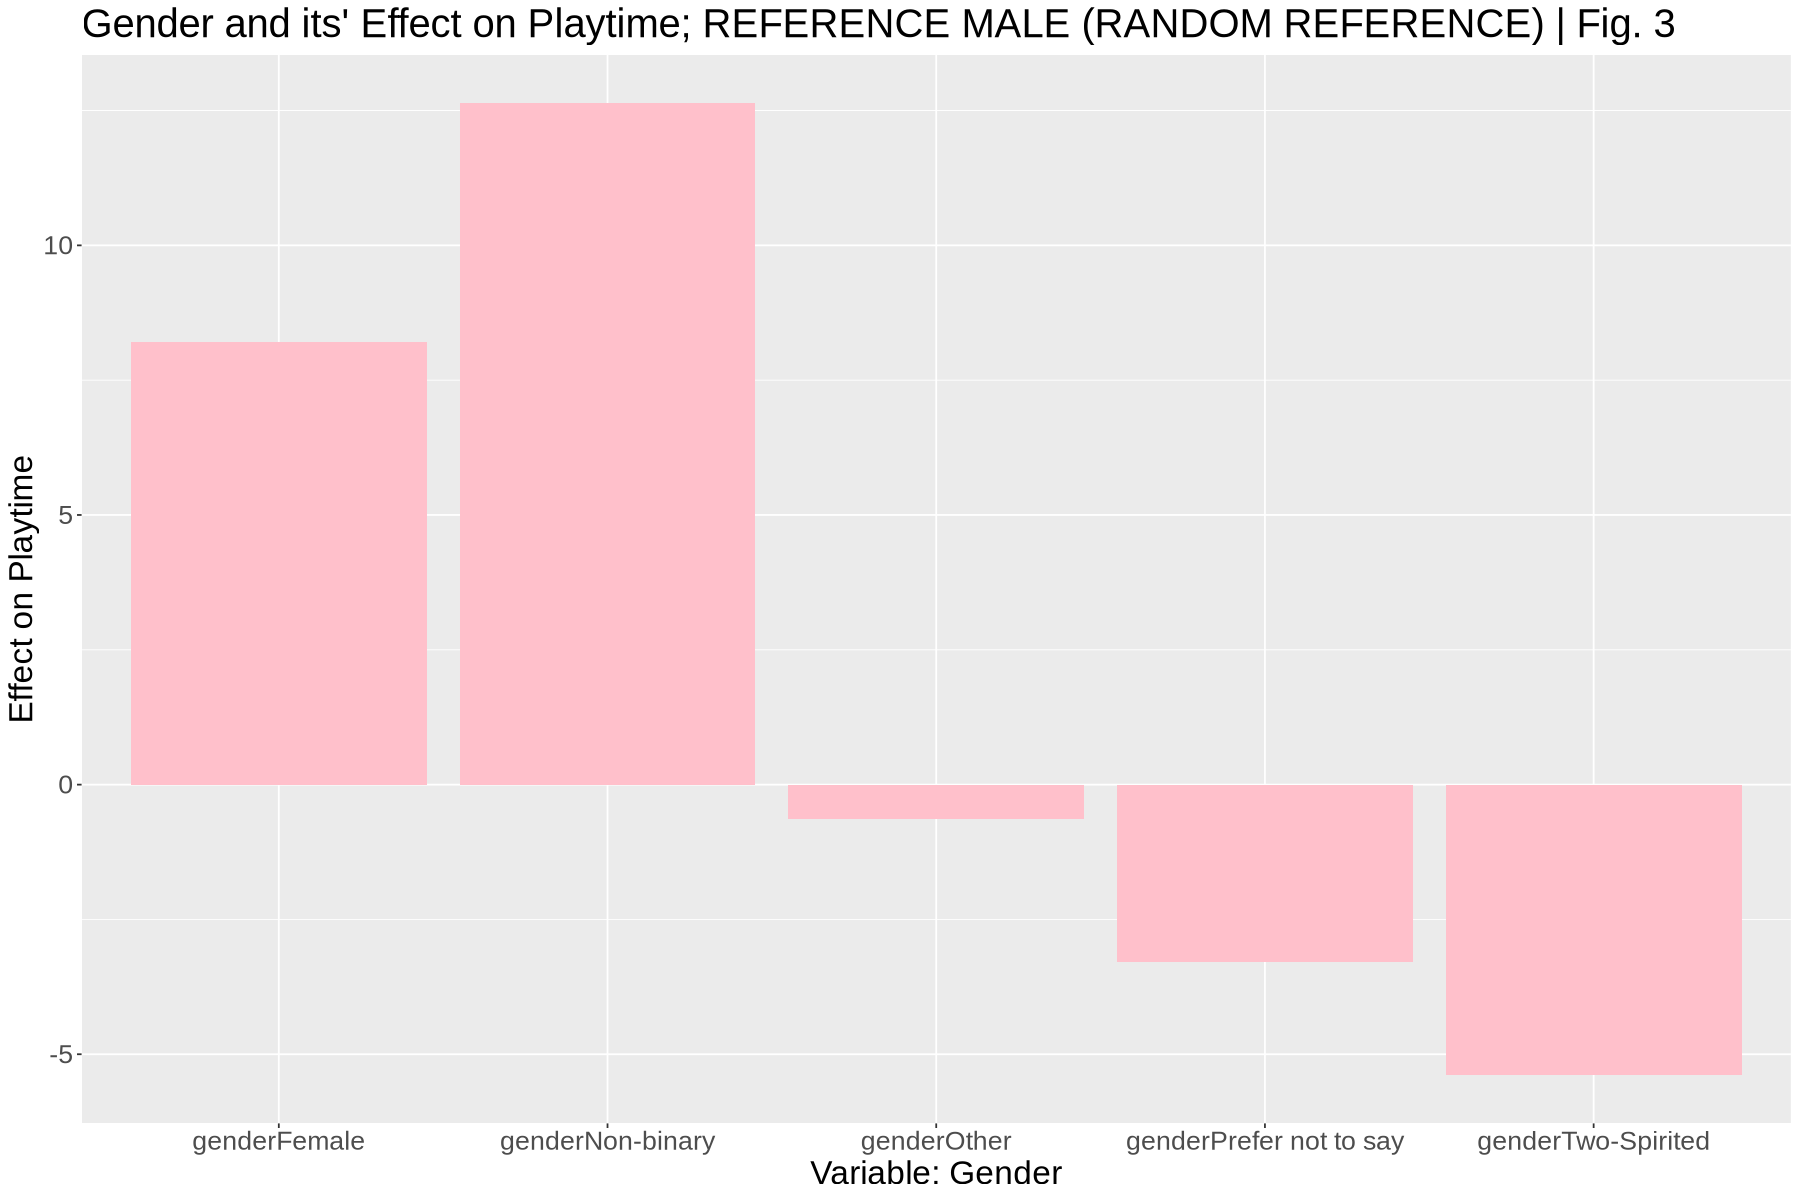

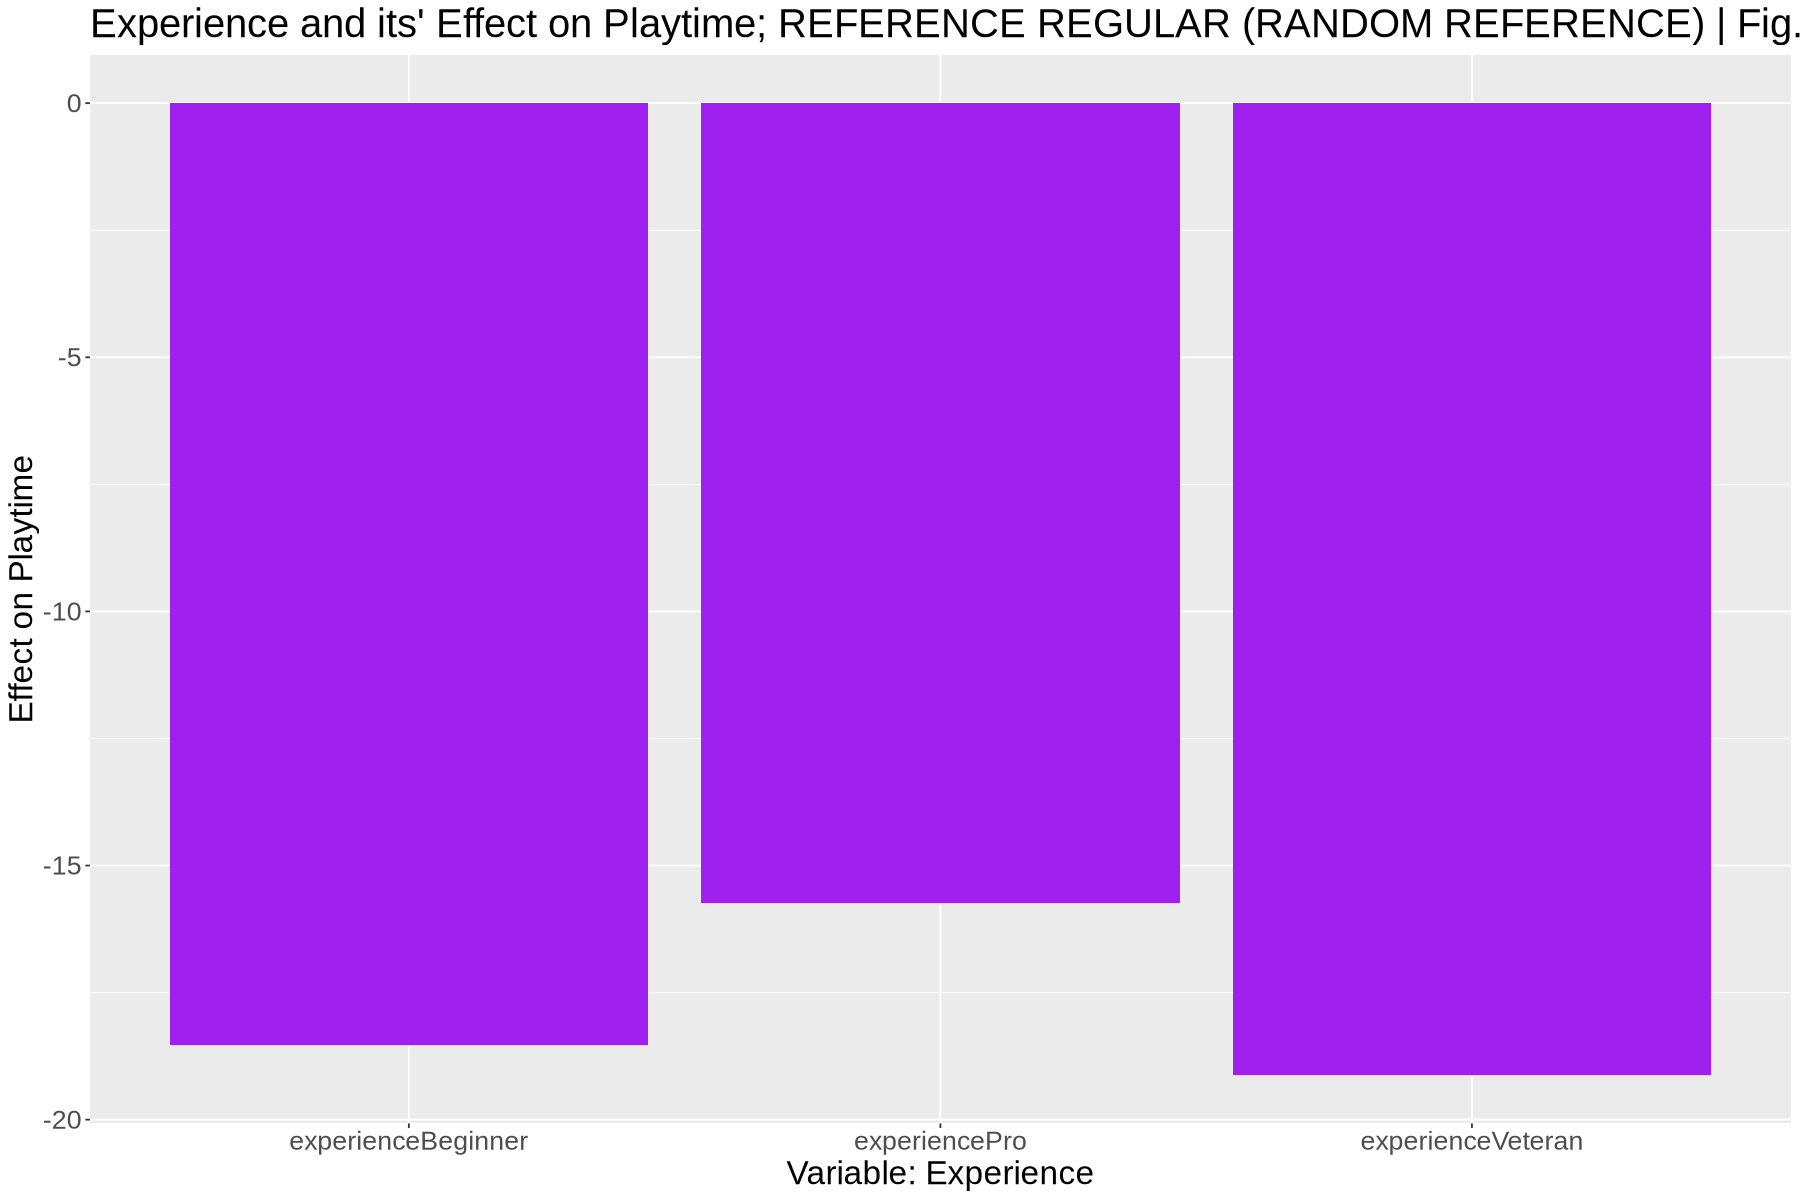

In [8]:
#MAKE 2 PLOTS ONE WITH GENDER ONE WITH EXPERIENCE AND COEFFICIENTS ON PLAYTIME; MALE AND REGULAR REFERENCE 

#THE REASON WHE DO THIS IS BECAUSE IT ISOLATES THE VARIABLE AND ITS' EFFECT ON THE PLAYTIME: ALTHOUGH WE DO HAVE TO DO IT AS A REFERENCE OF SOMETHING ELSE, WHICH IS WHY I MADE 2 SEPERATE REFERENCES!

#CHANGE THE SIZE OF THE PLOT TO MAKE SURE ITS GOOD!
options(repr.plot.width = 15, repr.plot.height = 10)

#JUST GENDER AND COEFFICIENT (THE ONLY TERM IS GENDER); MALE REFERENCE 
gender_vs_coefficients <- ggplot(coefficients_gender, aes(x = term, y = estimate)) +
    geom_bar(stat = "identity", fill = "pink") +
    labs(x = "Variable: Gender", y = "Effect on Playtime", title = "Gender and its' Effect on Playtime; REFERENCE MALE (RANDOM REFERENCE) | Fig. 3") +
    theme(text = element_text(size = 20))
gender_vs_coefficients 

#JUST EXPERIENCE AND COEFFICIENT (THE ONLY TERM IS EXPERIENCE); REGULAR REFERENCE
experience_vs_coefficients <- ggplot(coefficients_experience, aes(x = term, y = estimate)) +
    geom_bar(stat = "identity", fill = "purple") +
    labs(x = "Variable: Experience", y = "Effect on Playtime", title = "Experience and its' Effect on Playtime; REFERENCE REGULAR (RANDOM REFERENCE) | Fig. 4") +
    theme(text = element_text(size = 20))
experience_vs_coefficients 

*Method & Results:*

8) Here I combined the 2 plots into one for an different viewing experience.

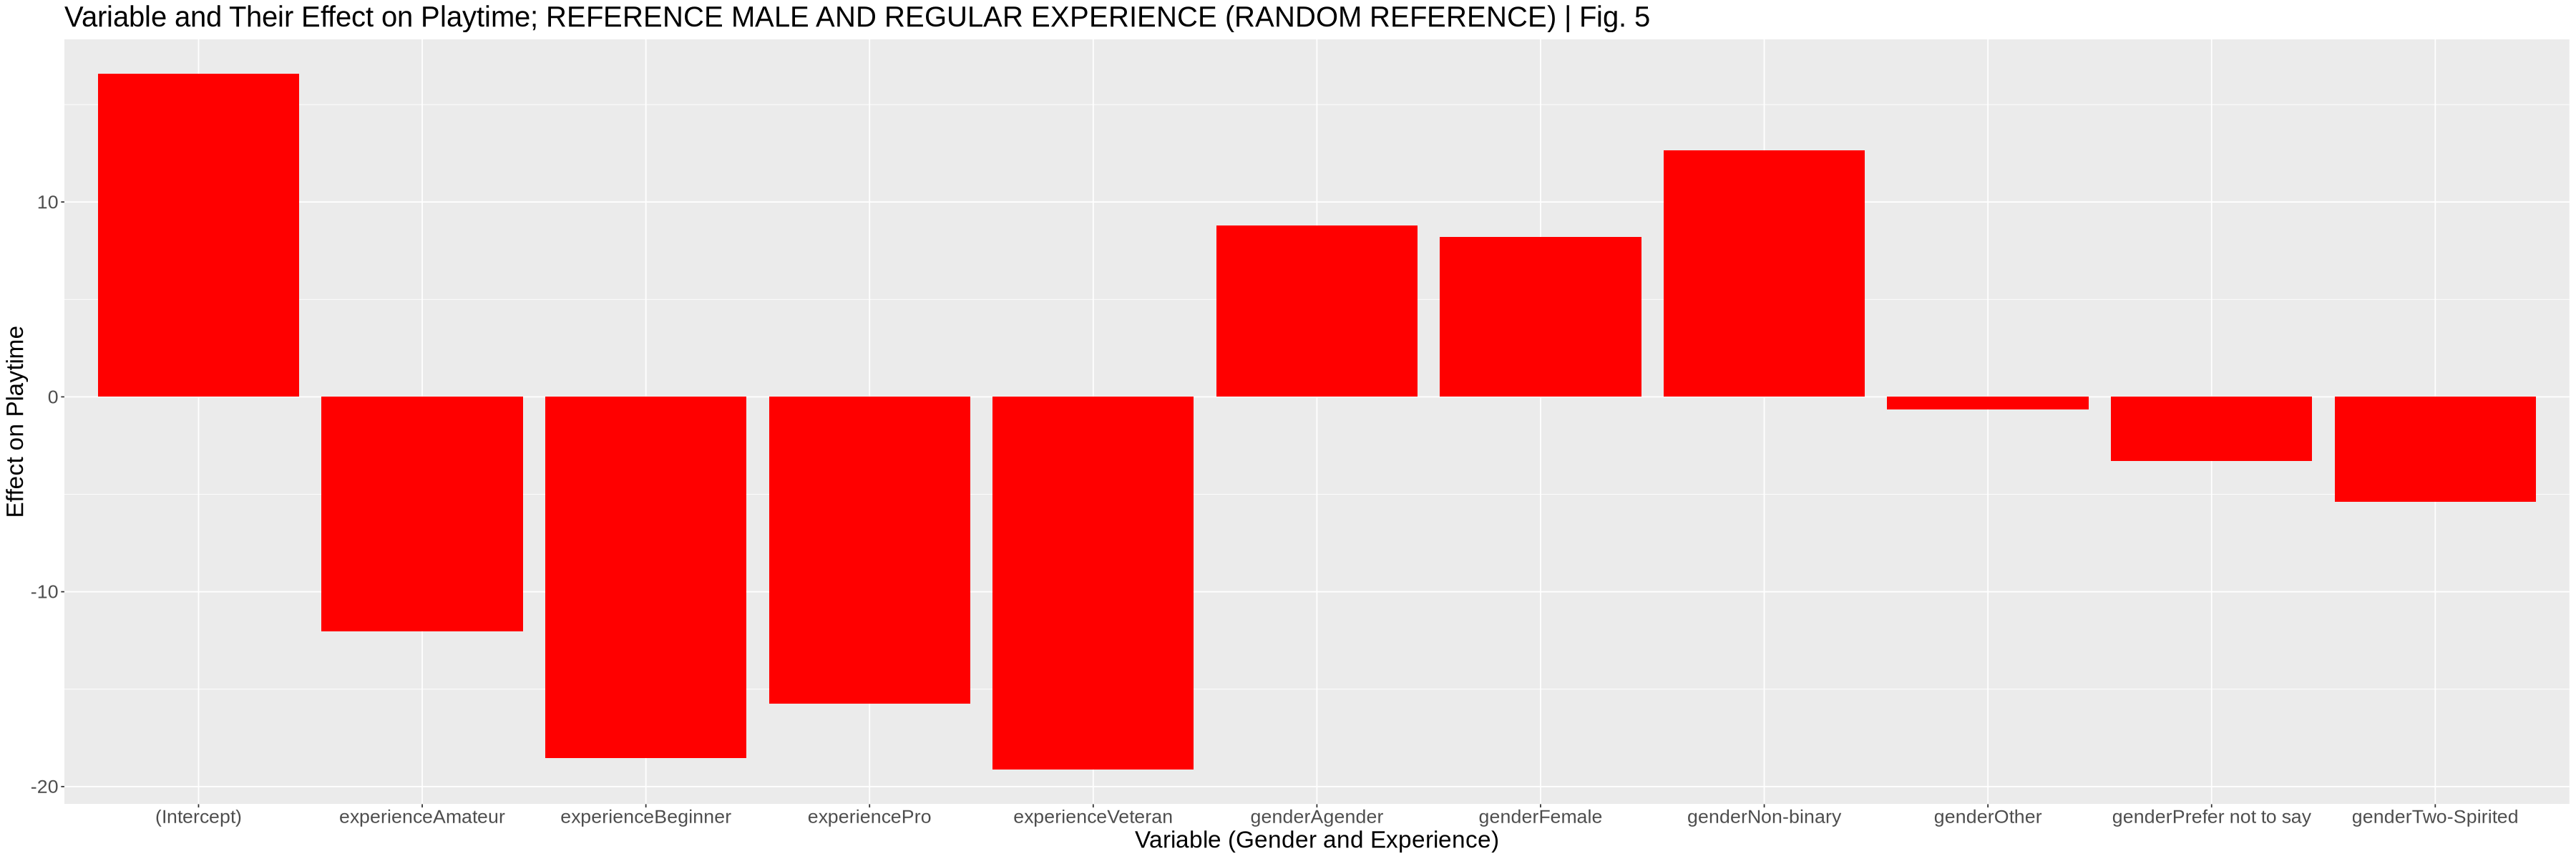

In [9]:
#COMBINED INFORMATION (EASY TO VIEW AND COMPARE 2 DIFFERENT VARIABLE TYPES (GENDER AND EXPERIENCE)); MALE AND REGULAR AS REFERENCE 

options(repr.plot.width = 30, repr.plot.height = 10)

variable_vs_coefficients <- ggplot(coefficients_data , aes(x = term, y = estimate)) +
    geom_bar(stat = "identity", fill = "red") +
    labs(x = "Variable (Gender and Experience)", y = "Effect on Playtime", title = "Variable and Their Effect on Playtime; REFERENCE MALE AND REGULAR EXPERIENCE (RANDOM REFERENCE) | Fig. 5") +
    theme(text = element_text(size = 20)) 
variable_vs_coefficients

*Method & Results:*

9) This time I made another workflow, but made the linear regression model in reference to Two - Spirited and Veteran players.

In [10]:
#MAKING ANOTHER WORKFLOW 
#THIS TIME OUR REFERENCE IS GOING TO BE THE LOWEST MEAN PLAYTIME GATHERED FROM OUR VERY FIRST PLOTS! 
#VETERAN AND TWO - SPIRTED WERE THE LOWEST MEAN PLAYTIME, SO LETS COMPARE OUR CATEGORIES TO THOSE! LINEAR REGRESSION. 

#MAKING THE WORKFLOW
# IN RECIPE WE MADE IT SO THAT WE ARE USING MALE AND REGULAR AS OUR REFERENCE! WE WILL HAVE ANOTHER ONE WITH OTHER REFERENCE!  

players_data_new2 <- players_data |>
    mutate(gender = fct_relevel(gender, "Two-Spirited"), experience = fct_relevel(experience, "Veteran"))
players_data_new2

#MAKE RECIPE: HOURS PLAYED BASED OFF OF GENDER AND EXPERIENCE (COMING FROM PLAYERS_DATA) 
#NO SCALING AS THEY ARENT NUMBER VARIABLES
recipe2 <- recipe(played_hours ~ gender + experience, data = players_data_new2) 

#MAKE A MODEL USING LINEAR REGRESSION SO WE CAN SEE COEFFICIENTS 
model2 <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

#ADD RECIPE AND MODEL INTO A WORKFLOW TOGETHER 
workflow2 <- workflow() |>
    add_recipe(recipe2) |>
    add_model(model2)
workflow2

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
Linear Regression Model Specification (regression)

Computational engine: lm 


*Methods & Results*

10) I fitted the workflow onto the players_data_new2 dataset. This is so I can see the coefficients for each observation; which tells us how that speficic observation effects playtime (we have seperated the variable from other factors!).

In [11]:
#EVALUATE THE COEFFICENTS USING PREDICT; ADD OUR WORKFLOW TO OUR FITTED MODEL (TRAINING DATA)

fitted_model2 <- fit(workflow2, data = players_data_new2)
fitted_model2

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)            genderAgender             genderFemale  
                -7.9240                  14.1740                  13.5908  
             genderMale         genderNon-binary              genderOther  
                 5.3818                  18.0182                   4.7412  
genderPrefer not to say        experienceAmateur       experienceBeginner  
                 2.0852                   7.0859                   0.5825  
          experiencePro        experienceRegular  
                 3.3828                  19.1181  


*Method & Results:*

11) I did this to tidy the fitted model. This allows me to use the coefficients data and plot it using ggplot.

I also made 2 seperate dataframes based off of this coefficient data, one which included gender coefficients, and one which included experience level coefficients. This makes it easier for when I am plotting the plots.

In [12]:
#MAKE IT SO WE CAN SEE THIS DATA IN A TIDY WAY
coefficients_data2 <- tidy(fitted_model2)
coefficients_data2 

#DID THIS SO I CAN SEE THE TERM NAMES SO THEN WHEN I FILTER THEM I KNOW WHAT THE NAMES ARE 
print(coefficients_data2, nrow = 11)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.924029,12.50608,-0.6336142,0.5271152
genderAgender,14.174029,23.41032,0.6054606,0.5456150
genderFemale,13.590789,12.41831,1.0944157,0.2751956
⋮,⋮,⋮,⋮,⋮
experienceBeginner,0.5824984,6.585688,0.08844913,0.929615386
experiencePro,3.3827904,8.827007,0.38323185,0.701987868
experienceRegular,19.1180626,6.275642,3.04639168,0.002654556


# A tibble: 11 × 5
   term                    estimate std.error statistic p.value
   <chr>                      <dbl>     <dbl>     <dbl>   <dbl>
 1 (Intercept)               -7.92      12.5    -0.634  0.527  
 2 genderAgender             14.2       23.4     0.605  0.546  
 3 genderFemale              13.6       12.4     1.09   0.275  
 4 genderMale                 5.38      11.8     0.454  0.650  
 5 genderNon-binary          18.0       14.0     1.29   0.198  
 6 genderOther                4.74      31.4     0.151  0.880  
 7 genderPrefer not to say    2.09      14.3     0.146  0.884  
 8 experienceAmateur          7.09       5.65    1.26   0.211  
 9 experienceBeginner         0.582      6.59    0.0884 0.930  
10 experiencePro              3.38       8.83    0.383  0.702  
11 experienceRegular         19.1        6.28    3.05   0.00265


In [13]:
#SPLIT THE DATASET INTO EXPERIENCE AND GENDER (2 SEPERATE TABLES)

coefficients_gender2 <- coefficients_data2 |>
    filter(term == "genderFemale" | 
           term == "genderMale" |
           term == "genderNon-binary" |
           term == "genderOther" |
           term == "genderPrefer not to say" |
           term == "genderTwo-Spirited ")
coefficients_gender2

coefficients_experience2 <- coefficients_data2 |>
    filter(term == "experienceBeginner" |
           term == "experiencePro" |
           term == "experienceRegular"|
           term == "experienceVeteran")
coefficients_experience2

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
genderFemale,13.590789,12.41831,1.0944157,0.2751956
genderMale,5.381800,11.84487,0.4543571,0.6501045
genderNon-binary,18.018151,13.95215,1.2914246,0.1981677
genderOther,4.741238,31.37247,0.1511273,0.8800399
genderPrefer not to say,2.085189,14.27610,0.1460615,0.8840318


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
experienceBeginner,0.5824984,6.585688,0.08844913,0.929615386
experiencePro,3.3827904,8.827007,0.38323185,0.701987868
experienceRegular,19.1180626,6.275642,3.04639168,0.002654556


Method & Results:

12) Now it's time to make 2 plots, one which compares gender (each specific gender) to playtime, and one which compared experience (each experience level), to playtime.
Something to note about these graphs, they are in comparison to Two - Spirited and Veteran experience, and they are the coefficient, so they represent a factor in comparison to these observations, they are not counts, they are a factor of Two - Spirited gender and Veteran experience.

Two - Spirited and Veteran experience were selected because they had the lowest average playtime (when including all factors), so I decided that it would be interesting to use them as a reference as the other observations would have all higher values in comparison. 

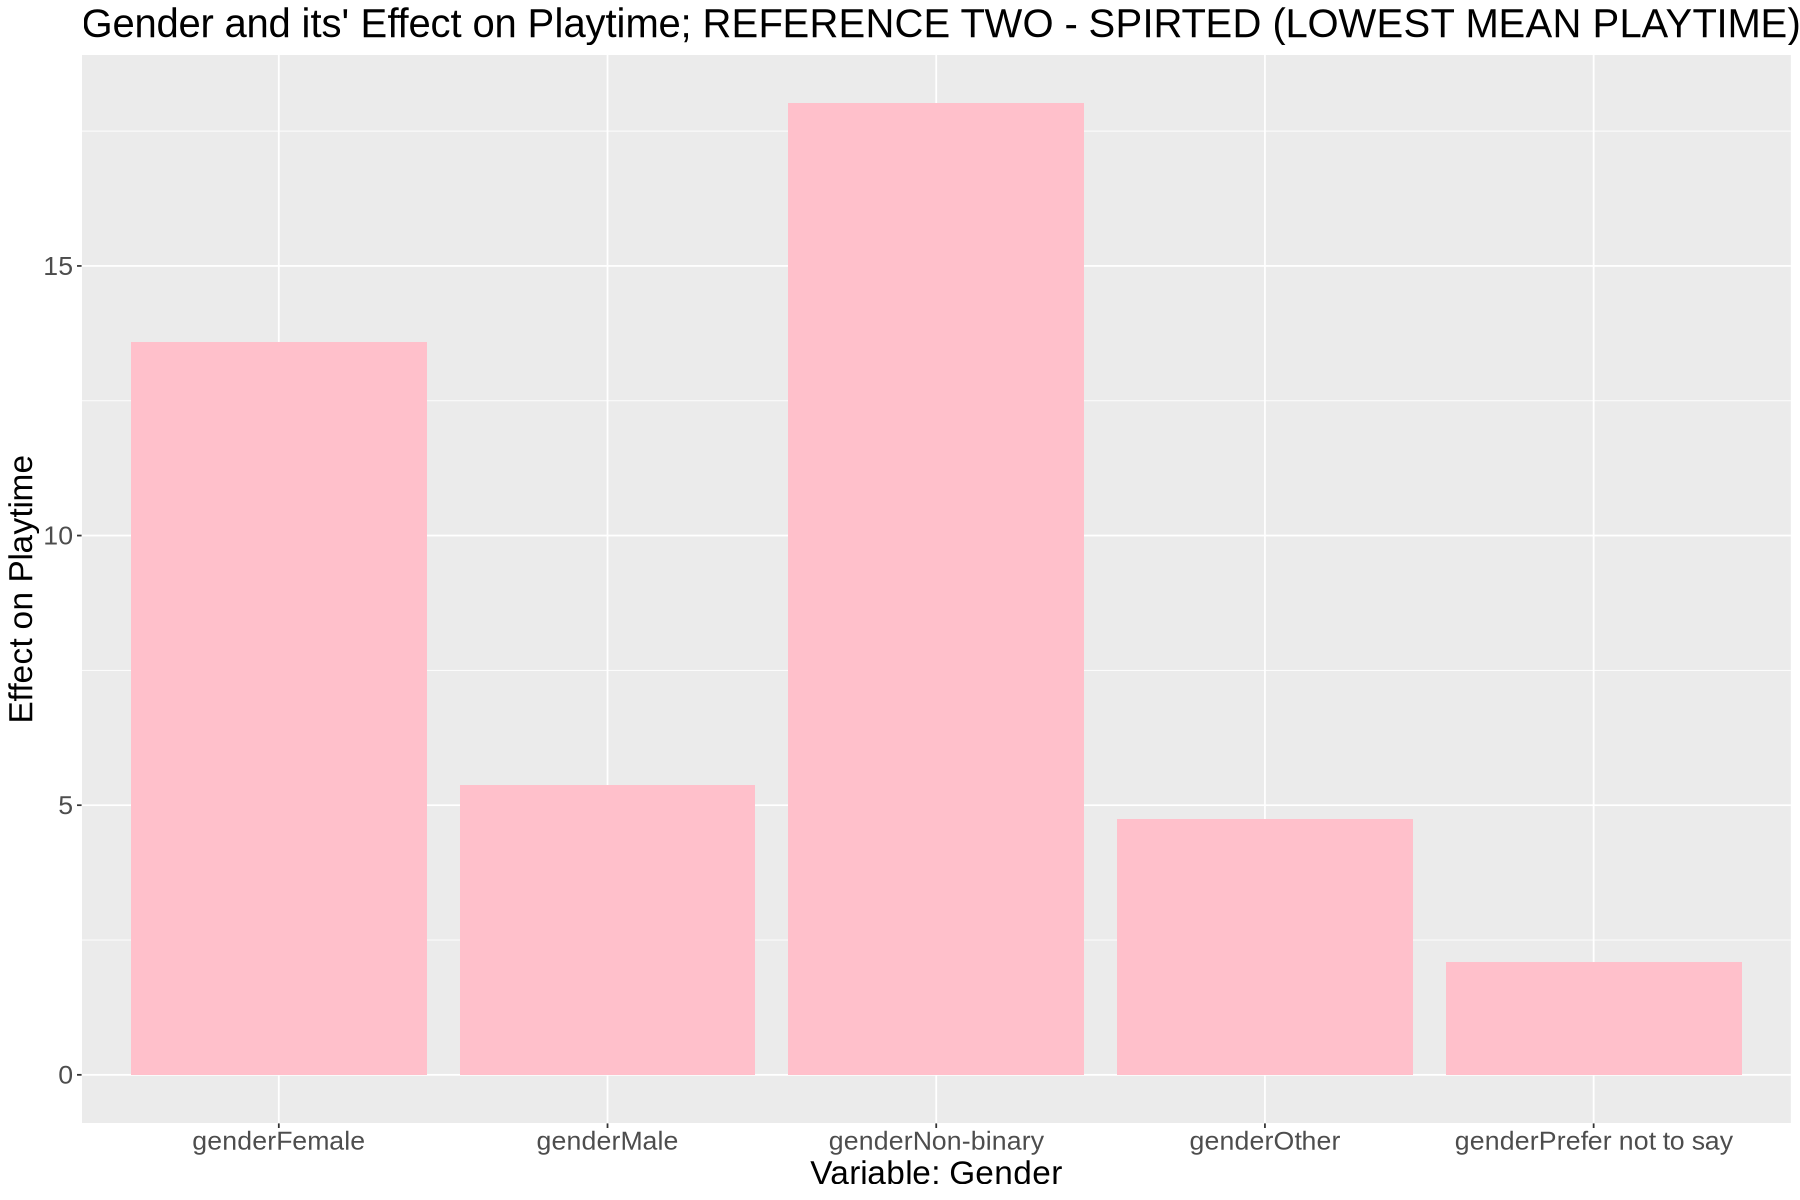

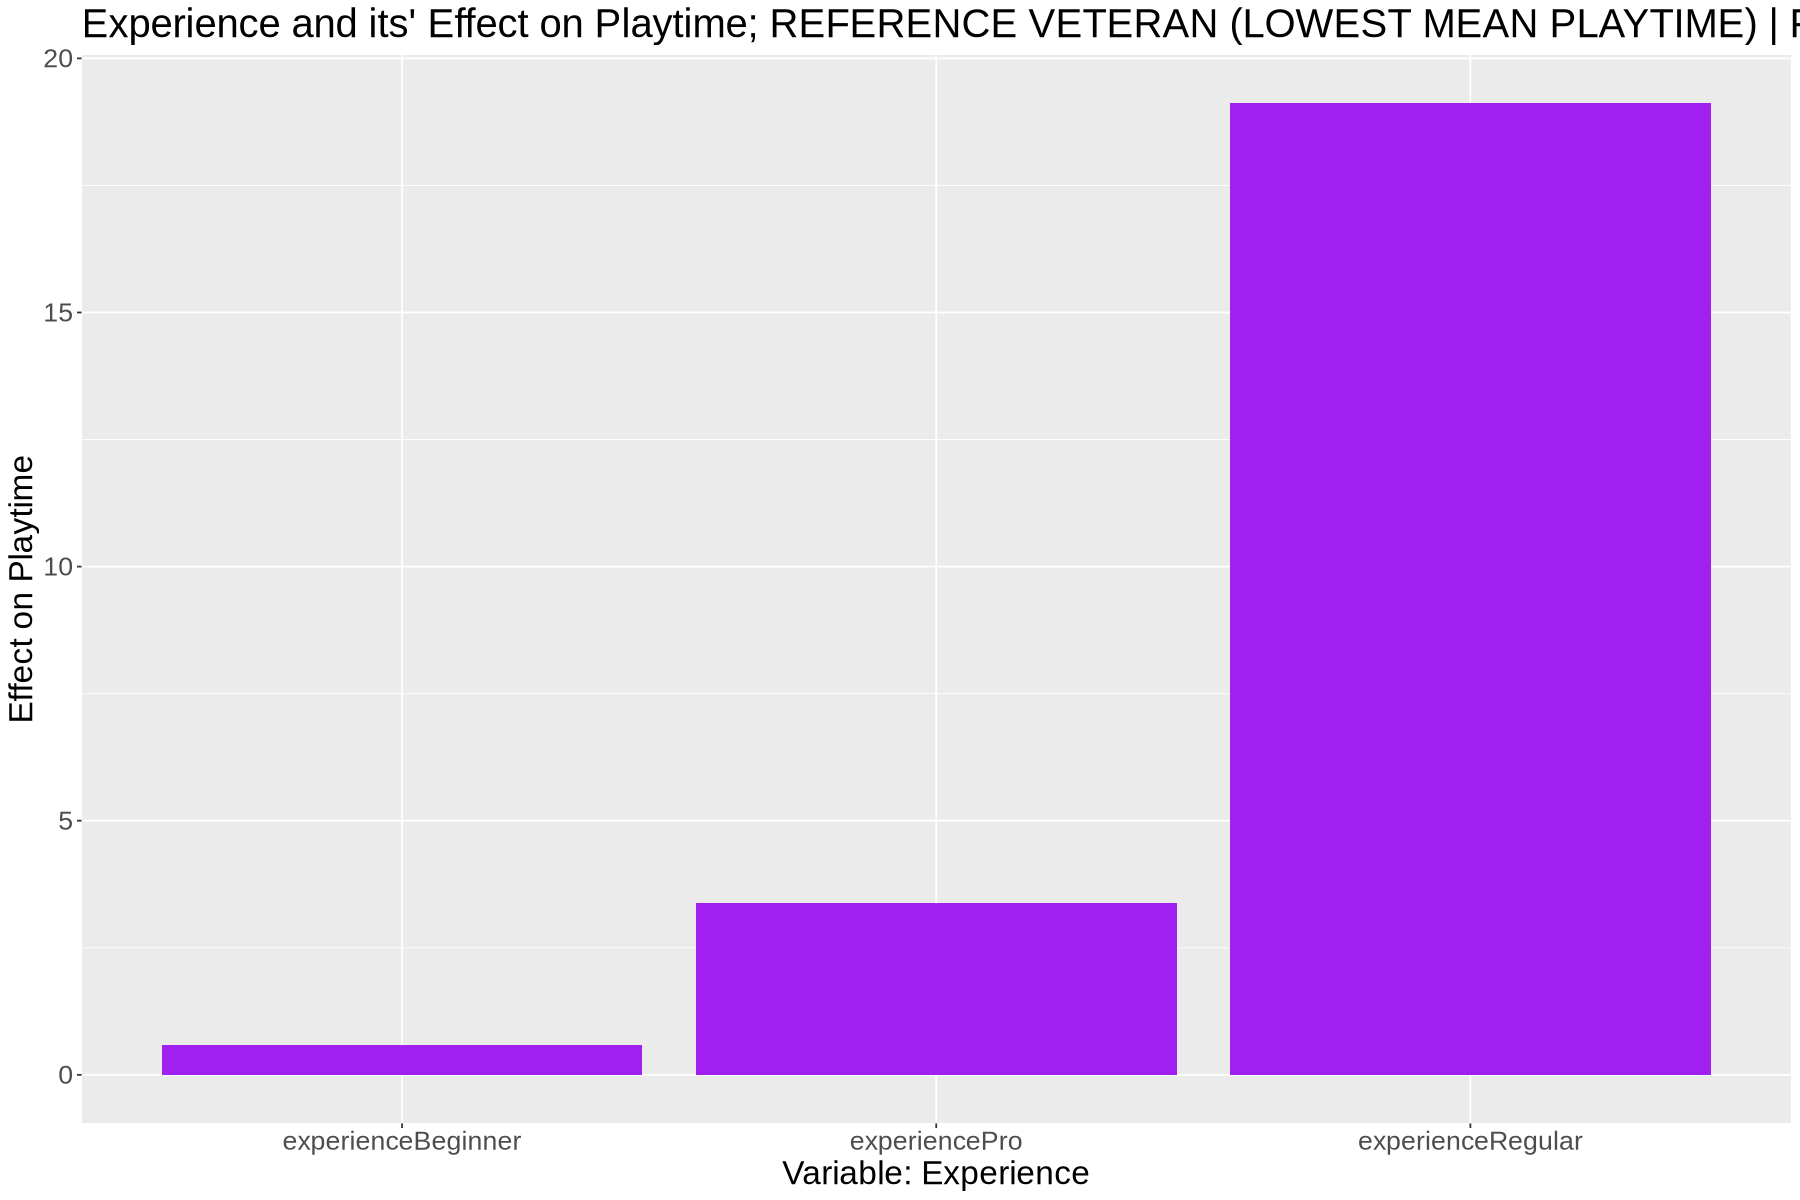

In [14]:
#MAKE 2 PLOTS ONE WITH GENDER ONE WITH EXPERIENCE AND COEFFICIENTS ON PLAYTIME 

#THE REASON WHE DO THIS IS BECAUSE IT ISOLATES THE VARIABLE AND ITS' EFFECT ON THE PLAYTIME: ALTHOUGH WE DO HAVE TO DO IT AS A REFERENCE OF SOMETHING ELSE, WHICH IS WHY I MADE 2 SEPERATE REFERENCES!

#CHANGE THE SIZE OF THE PLOT TO MAKE SURE ITS GOOD!
options(repr.plot.width = 15, repr.plot.height = 10)

#JUST GENDER AND COEFFICIENT (THE ONLY TERM IS GENDER) 
gender_vs_coefficients2 <- ggplot(coefficients_gender2, aes(x = term, y = estimate)) +
    geom_bar(stat = "identity", fill = "pink") +
    labs(x = "Variable: Gender", y = "Effect on Playtime", title = "Gender and its' Effect on Playtime; REFERENCE TWO - SPIRTED (LOWEST MEAN PLAYTIME) | Fig. 6") +
    theme(text = element_text(size = 20))
gender_vs_coefficients2 

#JUST EXPERIENCE AND COEFFICIENT (THE ONLY TERM IS EXPERIENCE)
experience_vs_coefficients2 <- ggplot(coefficients_experience2, aes(x = term, y = estimate)) +
    geom_bar(stat = "identity", fill = "purple") +
    labs(x = "Variable: Experience", y = "Effect on Playtime", title = "Experience and its' Effect on Playtime; REFERENCE VETERAN (LOWEST MEAN PLAYTIME) | Fig. 7") +
    theme(text = element_text(size = 20))
experience_vs_coefficients2 

Method & Results:

13) Here I combined the 2 plots into one for an different viewing experience.

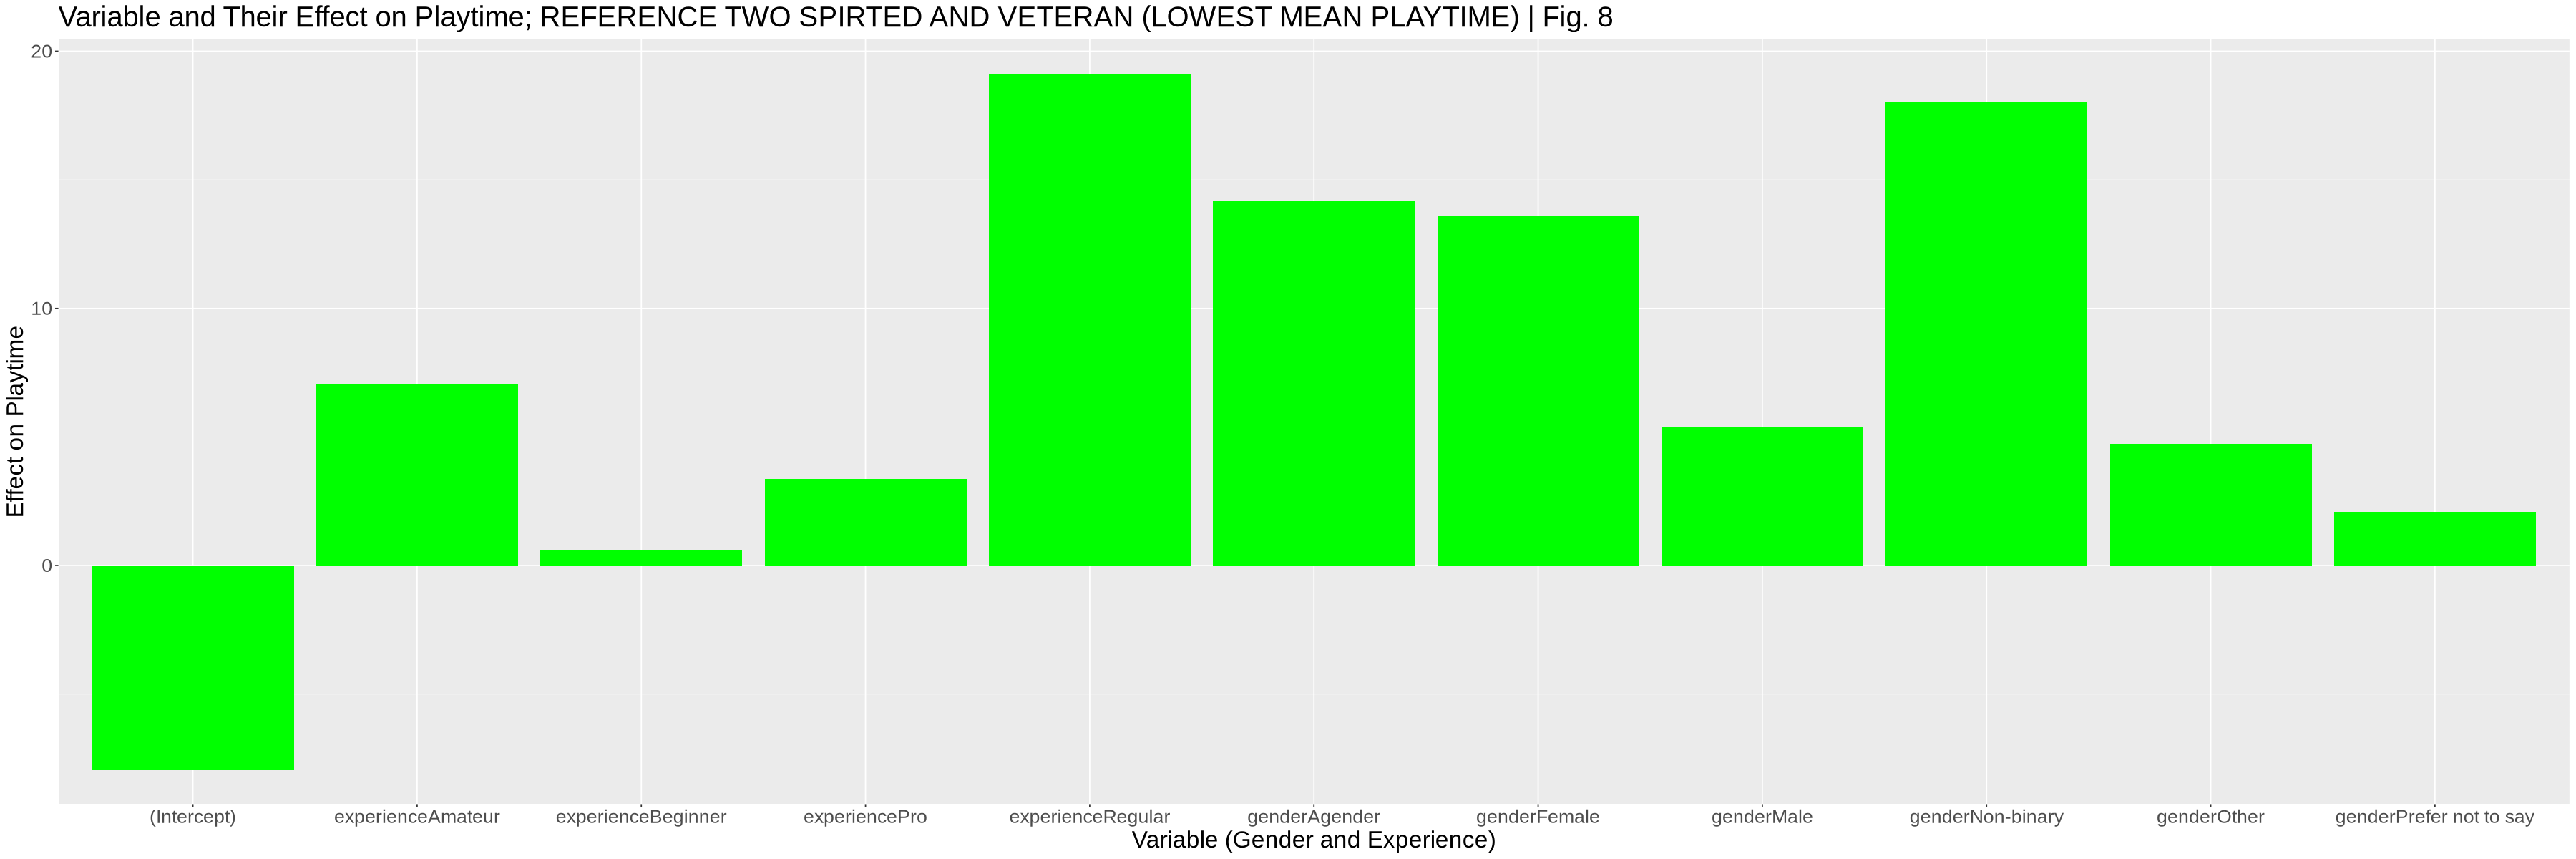

In [15]:
#COMBINED INFORMATION (EASY TO VIEW AND COMPARE 2 DIFFERENT VARIABLE TYPES (GENDER AND EXPERIENCE)); TWO SPIRTED AND VETERAN REFERENCE (THEY HAVE LOWEST MEAN PLAYTIME) 

options(repr.plot.width = 30, repr.plot.height = 10)

variable_vs_coefficients2 <- ggplot(coefficients_data2, aes(x = term, y = estimate)) +
    geom_bar(stat = "identity", fill = "green") +
    labs(x = "Variable (Gender and Experience)", y = "Effect on Playtime", title = "Variable and Their Effect on Playtime; REFERENCE TWO SPIRTED AND VETERAN (LOWEST MEAN PLAYTIME) | Fig. 8") +
    theme(text = element_text(size = 20)) 
variable_vs_coefficients2

Applying the model + Data analysis: 

Note, I didn't apply the model onto a specific set of data, what I did was create a linear regression using the provided dataset, and with that got the coefficients of each observation and modeled them. I think this approach is unique and allows the viewer to visualize the effect that each observation has in a bar plot. I still made a linear regression, but decided that I would use it in a different way!

Some key components to think of when doing linear regression is we want 2 variables that are somewhat linearly related. Two weaknesses within this method is if they both aren't linearly related then the model will preform poorly, and linear regression is sensitive to outliers, which can skew the coefficients (slope), of the line. 

Selecting linear regression was done so we can isolate the effect that each variable has on the playtime. I wanted to know how each variable (specifically each observation within the variable) contributed to playtime.

*Discussion:*

Summarize of what was found: 

When looking out our linear regression graphs, it was notable in all of them that the gender Non Binary seemed to have the greatest effect on playtime in comparison to the other genders. When looking our experience, it was notabale in that the Regular experience level seemed to have the greatest effect on playtime in comparison to other experience levels.

Is this what was expected? 

Personally, I didn't have any expectations about which gender would have the most playtime on the UBC Minecraft server, although I did have expectations for the experience level. Personally I thought that the Veteran experience would have the most effect on playtime on the UBC Minecraft server as they are the people who have played Minecraft the most. Clearly I was wrong in asssuming this as the Regular experience level had the most positive effect on playtime. 

Impacts of findings:

With this information, the UBC Minecraft server players could seek out Non Binary people with Regular experience level, in hopes that these 2 combinations of variables would mean theres a high chance they would play on the server lots. But there is another perspective on this that could be taken. Of course the Minecraft server players want more players that play more on the server, contributing to buildings and the community, but they may also take into consideration why the other observations (other genders and experience levels), don't have as high of a positive impact on playtime as Non Binary and Regular experience does. Maybe players with Beginner experience would like a tutorial on how to play, or Veteran players want to be in advanced buildings and such. They could take this and also change some things they do in the server to promote other players playing aswell for a stronger diversity. 


Future Questions: 

Future questions could include evaluating more predictors and seeing their effect on the playtime. Like the age of the person!

*References:* 

Cited is the source I got fct_relevel function:

Wickham, H. Reorder factor levels by hand, *forcats*, https://forcats.tidyverse.org/reference/fct_relevel.html 